In [4]:
# Колодяжная Александра, Фофанов Михаил

In [88]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

Будем учиться классифицировать жанры музыки. В отличие от проекта, который вас ждет, здесь мы будем работать не с сырыми данными (аудиодорожками), а уже в осмысленными признаками (правда, не все из них имеют понятные названия). Сами данные можно найти [здесь](https://www.kaggle.com/purumalgi/music-genre-classification). Будем использовать файл `train.csv`. Нашей задачей будет предсказание переменной `Class` (жанр песни) при помощи деревьев решений. Можно попробовать также другие методы классификации, которые мы прошли, и сравнить результаты. При обучении всех моделей не забывайте про разделение на тренировку и тест (или кросс валидацию [ссылка](https://www.youtube.com/watch?v=fSytzGwwBVw)).

### Задание 1. EDA (10 баллов)

Как обычно, начнем с того, что посмотрим на наши данные: типы переменных, пропущенные значения, баланс классов и все такое. Ваш ход:

In [64]:
data = pd.read_csv("train.csv")
data.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
Artist Name           17996 non-null object
Track Name            17996 non-null object
Popularity            17568 non-null float64
danceability          17996 non-null float64
energy                17996 non-null float64
key                   15982 non-null float64
loudness              17996 non-null float64
mode                  17996 non-null int64
speechiness           17996 non-null float64
acousticness          17996 non-null float64
instrumentalness      13619 non-null float64
liveness              17996 non-null float64
valence               17996 non-null float64
tempo                 17996 non-null float64
duration_in min/ms    17996 non-null float64
time_signature        17996 non-null int64
Class                 17996 non-null int64
dtypes: float64(12), int64(3), object(2)
memory usage: 2.3+ MB


In [66]:
# Rename column class
data_cur = pd.read_csv("train.csv", header = None, skiprows=1)
data_cur.columns = ['Artist Name',
 'Track Name',
 'Popularity',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_in min/ms',
 'time_signature', 'music_class']
data_cur.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,music_class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [67]:
list(data_cur.columns)

['Artist Name',
 'Track Name',
 'Popularity',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_in min/ms',
 'time_signature',
 'music_class']

In [68]:
data_cur.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,music_class
count,17568.000000,17996.000000,17996.000000,15982.000000,17996.000000,17996.000000,17996.000000,17996.000000,13619.000000,17996.000000,17996.000000,17996.000000,1.799600e+04,17996.000000,17996.000000
mean,44.512124,0.543433,0.662777,5.952447,-7.910660,0.636753,0.079707,0.247082,0.177562,0.196170,0.486208,122.623294,2.007445e+05,3.924039,6.695821
std,17.426928,0.166268,0.235373,3.196854,4.049151,0.480949,0.083576,0.310632,0.304048,0.159212,0.240195,29.571527,1.119891e+05,0.361618,3.206073
min,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,5.016500e-01,1.000000,0.000000
25%,33.000000,0.432000,0.509000,3.000000,-9.538000,0.000000,0.034800,0.004300,0.000089,0.097500,0.297000,99.620750,1.663370e+05,4.000000,5.000000
50%,44.000000,0.545000,0.700000,6.000000,-7.016000,1.000000,0.047400,0.081400,0.003910,0.129000,0.481000,120.065500,2.091600e+05,4.000000,8.000000
75%,56.000000,0.659000,0.860000,9.000000,-5.189000,1.000000,0.083000,0.434000,0.200000,0.258000,0.672000,141.969250,2.524900e+05,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


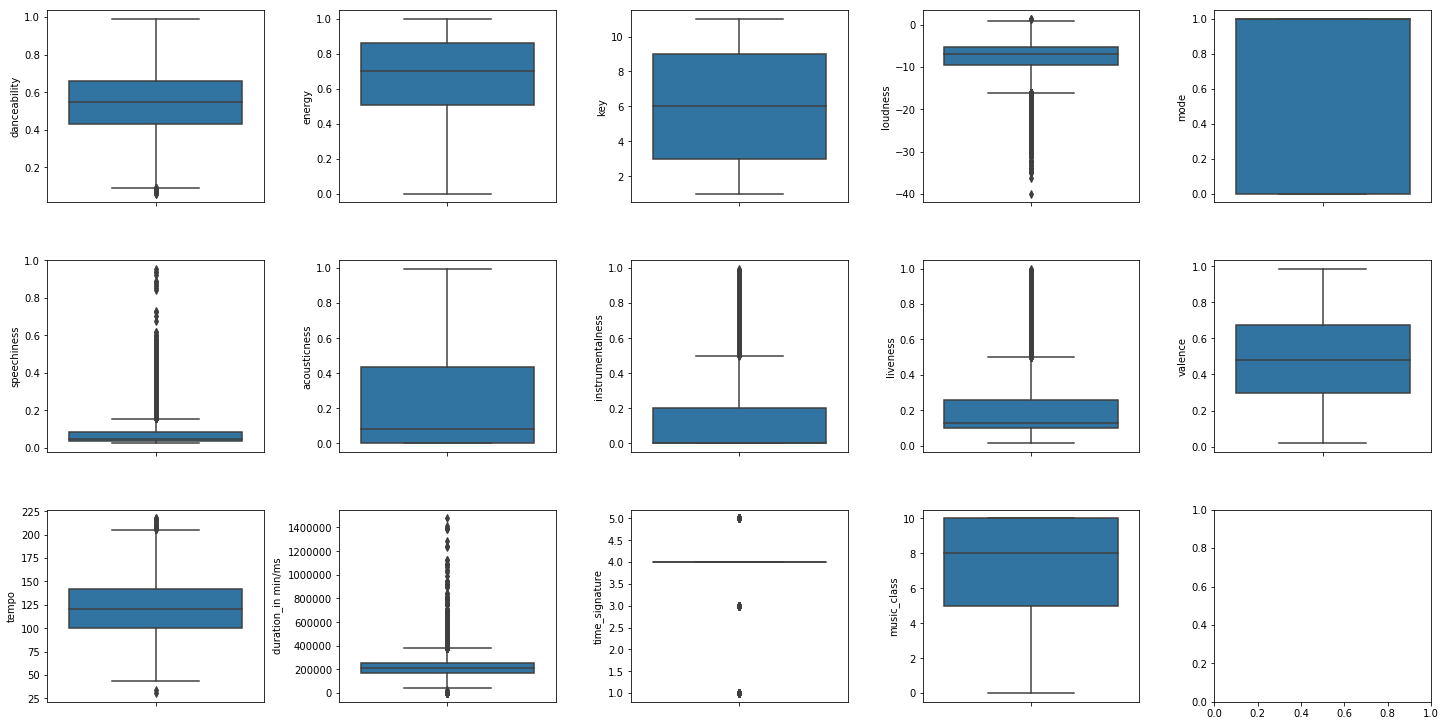

In [69]:
data_cur_numeric = data_cur.iloc[:, 3:17]
fig, axs = plt.subplots(ncols=5, nrows=3, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i,j in data_cur_numeric.items():
    sns.boxplot(y=i, data=data_cur_numeric, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [72]:
list(data_cur.columns)

['Artist Name',
 'Track Name',
 'Popularity',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_in min/ms',
 'time_signature',
 'music_class']

In [87]:
for i in list(music_all.columns):
    print(i)
    print(music_all[i].map(type).unique())

Artist Name
[<class 'str'>]
Track Name
[<class 'str'>]
Popularity
[<class 'float'>]
danceability
[<class 'float'>]
energy
[<class 'float'>]
key
[<class 'float'>]
loudness
[<class 'float'>]
mode
[<class 'int'>]
speechiness
[<class 'float'>]
acousticness
[<class 'float'>]
instrumentalness
[<class 'float'>]
liveness
[<class 'float'>]
valence
[<class 'float'>]
tempo
[<class 'float'>]
duration_in min/ms
[<class 'float'>]
time_signature
[<class 'int'>]


In [100]:
# Convert categorial data to numeric
music_all = data_cur.copy()
lab_encoder = preprocessing.LabelEncoder()
music_all['Artist Name'] = lab_encoder.fit_transform(music_all['Artist Name'])
music_all['Track Name'] = lab_encoder.fit_transform(music_all['Track Name'])

In [101]:
# Drop the NA and other weird values
music_all = music_all.fillna(music_all.mean())
#from sklearn.impute import SimpleImputer
#imp = SimpleImputer(missing_values=np.nan, strategy='mean')
#imp.fit(music_all)
#music_all = imp.transform(music_all)

In [102]:
music_cl = music_all['music_class']
del music_all['music_class']
music_all_train, music_all_test, music_cl_train,music_cl_test =train_test_split(music_all,music_cl, test_size = 0.3)

### Задание 2. Обучение дерева решений (10 баллов)

Предобработайте признаки так, чтобы их можно было подать в модель дерева решений и обучите ее, постарайтесь подобрать оптимальные гиперпараметры, которые вам известны. Постарайтесь также обосновать выбор метрики в данном случае. При подборе гиперпараметров может помочь `GridSearchCV` [ссылка](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [108]:
dt = DecisionTreeClassifier()
max_depth = [2,4,6,8]
min_samples_split = [10, 50, 100]
min_samples_leaf = [10, 50, 100]
parameters = {'criterion': ['gini', 'entropy'],'max_depth':[2,4,6,8], 'min_samples_split':[10, 50, 100], 'min_samples_leaf':[10, 50, 100],}
search = GridSearchCV(dt, parameters)
search.fit(music_all_train, music_cl_train)
best_tree = search.best_estimator_
predictions = best_tree.predict(music_all_test)

/home/avk/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [109]:
# Make confusion matrix for the tree classifier and plot the ROC curve

[[121   0   0   5  21   0   0  11   0   9   1]
 [  0   0  30   0   0  15 104   0  13  24 214]
 [  0   0 160   0   0   8  62   0   0  20 102]
 [ 48   0   0  75  13   0   0   7   0   1   6]
 [ 20   0   0  10  55   0   0   0   0   4   7]
 [  0   0   7   0   0 265  40   0   1  81  42]
 [  0   0  61   0   0  34 259   0  34  76 362]
 [ 17   0   0  11   0   0   0 156   0   0   0]
 [  0   1   2   0   0   2  22   0 218   4 310]
 [ 23   1  57   1  26  70  80   0   1 322 178]
 [  7   2  62   3  14  25 134   3  89 137 993]]


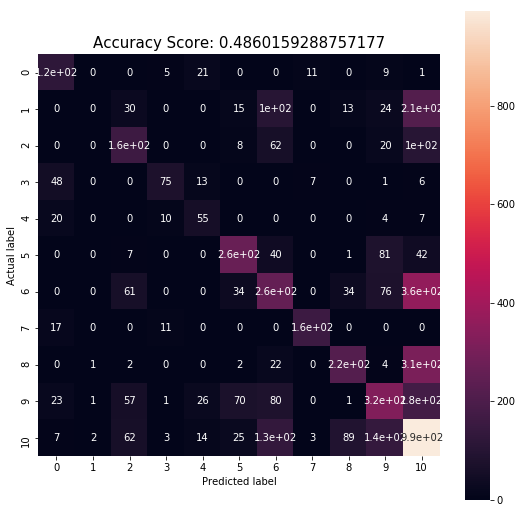

In [110]:
from sklearn import metrics
acc = best_tree.score(music_all_test, music_cl_test)
confusion = metrics.confusion_matrix(music_cl_test, predictions)
print(confusion)
plt.figure(figsize=(9,9))
sns.heatmap(confusion, annot=True, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc)
plt.title(all_sample_title, size = 15);

# The accuracy is low but given the number of classes, the predictions are not so bad as the number of classes are more than 2

### Задание 3. Другие модели (5 баллов за модель)

Проделайте операции из **Задания 2** с другими известными вам классификаторами. Стало ли лучше?

## Make logistic regression model

In [114]:
from sklearn.linear_model import (LinearRegression,
                                  LogisticRegression)
model = LogisticRegression()
model.fit(music_all_train, music_cl_train)
predictions = model.predict(music_all_test)

/home/avk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/avk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [115]:
# Make confusion matrix for the logistic regression and plot the ROC curve

[[  69    0    0   30    6    0    0   26    0   31    6]
 [   0    0    1    0    0    0    0    0    0   12  387]
 [   0    0    4    0    0    0    6    0    1    2  339]
 [  48    0    0   48    5    0    0   26    0   21    2]
 [  18    0    0    3   26    0    0   12    0   36    1]
 [   0    0    1    0    0    0    1    0    1   34  399]
 [   0    0    7    0    0    0    9    0    4   17  789]
 [  35    0    0    2    0    0    0  142    0    3    2]
 [   0    0    1    0    0    0    1    0    2   10  545]
 [  22    0    3    9   31    0    2    3    0  110  579]
 [   7    0    4    2   17    0    4    1    5   56 1373]]


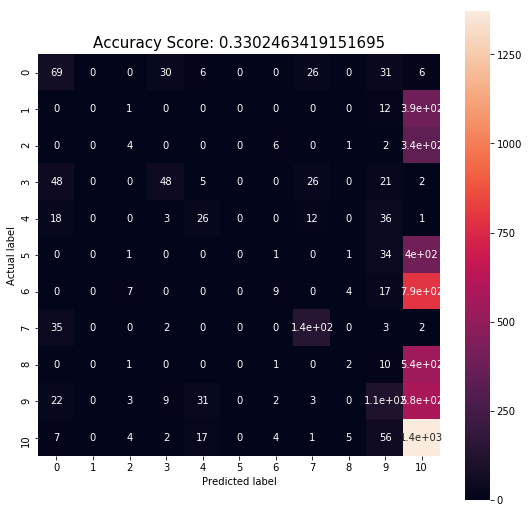

In [116]:
acc = model.score(music_all_test, music_cl_test)
confusion = metrics.confusion_matrix(music_cl_test, predictions)
print(confusion)
plt.figure(figsize=(9,9))
sns.heatmap(confusion, annot=True, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc)
plt.title(all_sample_title, size = 15);

# The accuracy is low but given the number of classes, the predictions are not so bad as the number of classes are more than 2. However, the performance of the logistic regression is worse than for the decision tree.

## Make Random Forest classifier

In [130]:
from sklearn.ensemble import RandomForestClassifier
dt = RandomForestClassifier(n_estimators = 15, max_depth = 5)
#max_depth = [2,4,6,8]
min_samples_split = [10, 50, 100]
min_samples_leaf = [10, 50, 100]
parameters = {'min_samples_split':[10, 50, 100],
              'min_samples_leaf':[10, 50, 100],}
search = GridSearchCV(dt, parameters)
search.fit(music_all_train, music_cl_train)
best_tree = search.best_estimator_
predictions = best_tree.predict(music_all_test)

/home/avk/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[[ 128    0    0    2    0    0    0    8    0   23    7]
 [   0    0    0    0    0   21   46    0   15   19  299]
 [   0    0   11    0    0   15   12    0    1   27  286]
 [  67    0    0   53    0    0    0   10    0   11    9]
 [  43    0    0    0   11    0    0    0    0   21   21]
 [   0    0    0    0    0  282    6    0    0   82   66]
 [   0    0    1    0    0   46   98    0   21   55  605]
 [  12    0    0    4    0    0    0  168    0    0    0]
 [   0    0    0    0    0    0    2    0  241    1  315]
 [  20    0    0    0    1   61   12    0    0  316  349]
 [   5    0    0    2    1   22   12    0   78   96 1253]]


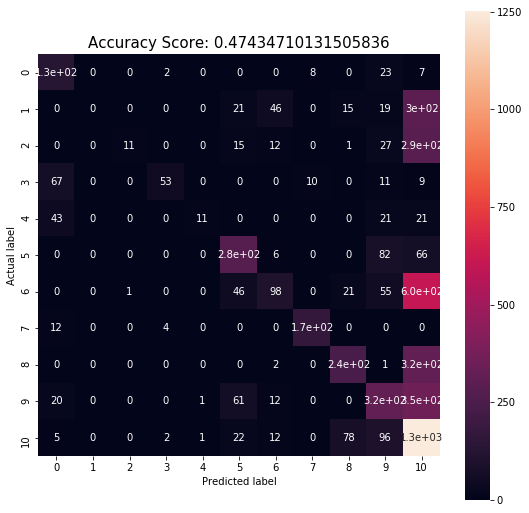

In [131]:
# Estimate performance
acc = best_tree.score(music_all_test, music_cl_test)
confusion = metrics.confusion_matrix(music_cl_test, predictions)
print(confusion)
plt.figure(figsize=(9,9))
sns.heatmap(confusion, annot=True, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc)
plt.title(all_sample_title, size = 15);

# The accuracy is low but given the number of classes, the predictions are not so bad as the number of classes are more than 2. However, the performance of the Random forest classifier is almost the same as for the decision tree. Most probably it needs more optimization which was not done as it required too much time and memory.

## Make AdaBoost Classifier

In [121]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
model = AdaBoostClassifier(n_estimators=100, random_state=0)
model.fit(music_all_train, music_cl_train)
predictions = model.predict(music_all_test)

[[ 12   0   0   1   0   0   0   6   0 119  30]
 [  0 122  73   0   0  22   5   0 164   2  12]
 [  0  73 200   0   0   9   3   0  62   0   5]
 [ 12   0   0  10   0   0   0   7   0  65  56]
 [  0   0   0   0   0   0   0   0   0  65  31]
 [  0  59  62   0   0 212   5   0  49  42   7]
 [  0 199 196   0   0  47  27   0 325  16  16]
 [  9   0   0   0   0   0   0 155   0  13   7]
 [  0  29  10   0   0   3   6   0 507   0   4]
 [  0 119 147   0   0 123  10   2  82 230  46]
 [  0 315 177   0   0  69  23   0 724  88  73]]


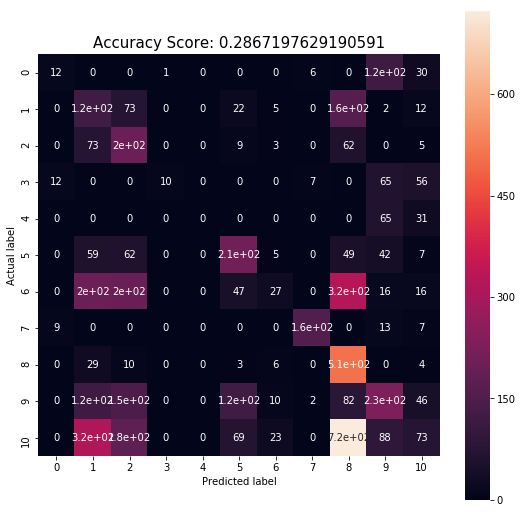

In [122]:
acc = model.score(music_all_test, music_cl_test)
confusion = metrics.confusion_matrix(music_cl_test, predictions)
print(confusion)
plt.figure(figsize=(9,9))
sns.heatmap(confusion, annot=True, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc)
plt.title(all_sample_title, size = 15);

# The accuracy is low but given the number of classes, the predictions are not so bad as the number of classes are more than 2. However, the performance of the Ada Boost classifier is worse than for the decision tree.

## Make K Neighbours Classifier

In [132]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(music_all_train, music_cl_train)
predictions = model.predict(music_all_test)

[[ 91   0   0  25  18   0   0  17   0  13   4]
 [  0  89  56   0   0  47  86   0  29  14  79]
 [  0  70  62   0   0  30  58   0  23  19  90]
 [ 55   0   0  69  11   0   0   9   0   6   0]
 [ 39   0   0  11  16   0   0  18   0  10   2]
 [  0  85  52   0   0  76  56   0  25  45  97]
 [  0 198 128   0   0  96 117   0  54  50 183]
 [ 87   0   0  25  23   0   0  33   0  12   4]
 [  0  96  69   0   0  68  88   0  56  20 162]
 [ 54 103  67  13  17 115  88   6  25 139 132]
 [ 15 312 224   6  11 160 195   8 122  90 326]]


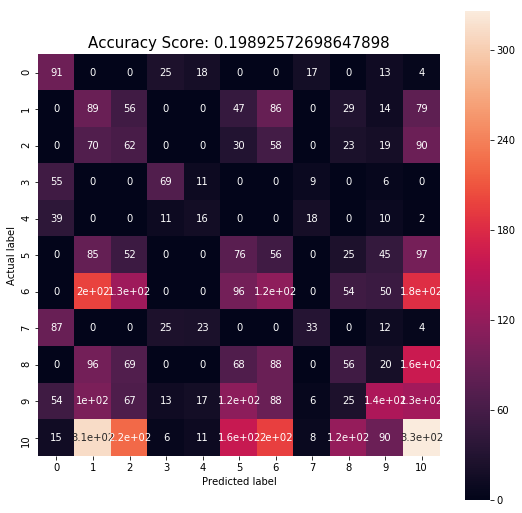

In [133]:
acc = model.score(music_all_test, music_cl_test)
confusion = metrics.confusion_matrix(music_cl_test, predictions)
print(confusion)
plt.figure(figsize=(9,9))
sns.heatmap(confusion, annot=True, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc)
plt.title(all_sample_title, size = 15);

## Make MLP Classifier

In [134]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(random_state=1, max_iter=300)
model.fit(music_all_train, music_cl_train)
predictions = model.predict(music_all_test)

[[  59    0    0    0   21    0    0   73    0   15    0]
 [   0    0    0    0    0    0    0    0    0  284  116]
 [   0    0    0    0    0    0    0    0    0  241  111]
 [  42    0    0    0    7    0    0   81    0   20    0]
 [  11    0    0    0   32    0    0   30    0   23    0]
 [   0    0    0    0    0    0    0    0    0  347   89]
 [   0    0    0    0    0    3    0    0    0  587  236]
 [  11    0    0    0    1    0    0  172    0    0    0]
 [   0    0    0    0    0    2    0    0    0  352  205]
 [  16    0    0    0   41    0    0   15    0  569  118]
 [   5    0    0    0   25    2    0    6    0 1008  423]]


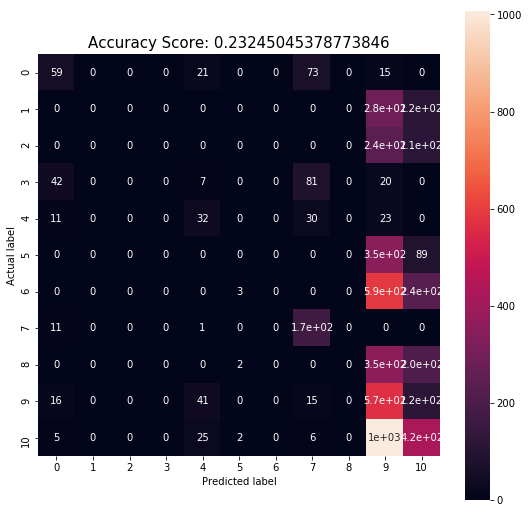

In [135]:
acc = model.score(music_all_test, music_cl_test)
confusion = metrics.confusion_matrix(music_cl_test, predictions)
print(confusion)
plt.figure(figsize=(9,9))
sns.heatmap(confusion, annot=True, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc)
plt.title(all_sample_title, size = 15);

## Make naive Bayes classifier (actually might not be suitable as requires Gaussian distribution but let's check)

In [136]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(music_all_train, music_cl_train)
predictions = model.predict(music_all_test)

[[ 106    0    0   22   23    0    0   17    0    0    0]
 [   0    0   12    0    0    0   24    0    1   20  343]
 [   0    0   28    0    0    0   58    0    7   11  248]
 [  75    0    0   55    9    0    0    9    0    2    0]
 [  31    0    0    1   56    0    0    8    0    0    0]
 [   0    0    5    0    0    0   16    0    2   79  334]
 [   0    0   40    0    0    0   95    0    2   45  644]
 [  33    0    0    6    0    0    0  145    0    0    0]
 [   0    0    3    0    0    0   15    0   23   11  507]
 [  61    0    2    8   53    0   26    0    1  187  421]
 [  11    0   17    4   32    0   70    0   13   95 1227]]


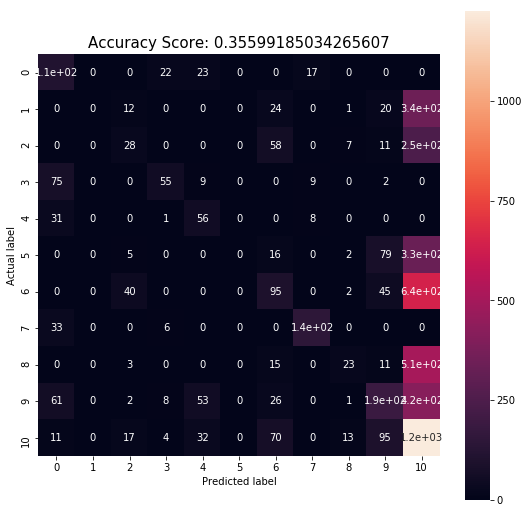

In [137]:
acc = model.score(music_all_test, music_cl_test)
confusion = metrics.confusion_matrix(music_cl_test, predictions)
print(confusion)
plt.figure(figsize=(9,9))
sns.heatmap(confusion, annot=True, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc)
plt.title(all_sample_title, size = 15);

# The classifiers by performance: best are Decision tree (acc = 0.48) and Random forest (acc = 0.47), then, Naive Bayes (acc = 0.36), Logistic regression (acc = 0.33), Ada boost (0.29), MLP (0.23), K neighbours (0.19)

### Задание 4. (3 балла)

Раз уж вы работаете в командах, то у вас есть шанс обсудить любимые фильмы. Напишите сюда 3 фильма, которые хотели бы посмотреть вместе:

1.

2.

3.

In [ ]:
# 1. Властелин колец 2. Половое воспитание 3. Меланхолия Харухи Судзумии